## Import packages

In [166]:
#import packages
from __future__ import division
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import seaborn as sns
import pickle as pkl

In [167]:
#import machine learning package
import sklearn.ensemble as ek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

## Import complete feature set made from Data Cleaning and EDA notebook


In [168]:
# import complete feature set made from Data Cleaning and EDA notebook
URLdata = pd.read_csv('../data/Complete_Feature_Set.csv', index_col = 0)

In [169]:
# check the loaded dataset
URLdata.head()

,url,no of dots,no of hyphen,len of url,no of at,no of double slash,no of subdir,no of subdomain,len of domain,no of queries,contains IP,presence of Suspicious_TLD,create_age(months),expiry_age(months),update_age(days),country,file extension,label,risk indicator
0,http://livelywebordainedkool.cf/harwoodservice...,0,0,4.189655,0,0,3,0,24,0,0,0,-1,-1,-1,None,.php,1,0
1,amazon.com.br:80/gp/redirect.html?_encoding=UT...,0,0,5.332719,0,0,2,0,16,173,0,0,-1,-1,-1,None,.html,0,0
2,usaerectionrx.com,0,0,2.833213,0,0,0,0,17,0,0,0,9,3,249,UA,.com,0,0
3,http://ciespains.com/delivery/index.htm,0,0,3.465736,0,0,2,0,13,0,0,0,1,11,0,None,.htm,1,0
4,http://paypalsecureresetloginpage.elifelfmarle...,0,0,4.158883,0,0,1,1,44,0,0,0,30,6,905,TR,None,1,0


## Check the Data Balance

In [170]:
#print total number of urls in the dataset
print('There are ' + str(len(URLdata)) + ' urls in the dataset.')
#percentage of malicious url
spam = len(URLdata[URLdata['label']==1])
percent_spam = spam/len(URLdata)*100
print(str(round(percent_spam,2)) + '% of urls are malicious urls.')

There are 47273 urls in the dataset.
49.6% of urls are malicious urls.


## Check NAs in the dataset

In [171]:
#check the existence of NA values 
URLdata.isnull().any()

url                           False
no of dots                    False
no of hyphen                  False
len of url                    False
no of at                      False
no of double slash            False
no of subdir                  False
no of subdomain               False
len of domain                 False
no of queries                 False
contains IP                   False
presence of Suspicious_TLD    False
create_age(months)            False
expiry_age(months)            False
update_age(days)              False
country                       False
file extension                False
label                         False
risk indicator                False
dtype: bool

## One-hot encoding on categorical variables

In [172]:
# Apply one-hot encoding to country and file extension
le = preprocessing.LabelEncoder()
URLdata['country'] = le.fit_transform(URLdata['country'])
URLdata['file extension'] = le.fit_transform(URLdata['file extension'])
URLdata.head(10)

,url,no of dots,no of hyphen,len of url,no of at,no of double slash,no of subdir,no of subdomain,len of domain,no of queries,contains IP,presence of Suspicious_TLD,create_age(months),expiry_age(months),update_age(days),country,file extension,label,risk indicator
0,http://livelywebordainedkool.cf/harwoodservice...,0,0,4.189655,0,0,3,0,24,0,0,0,-1,-1,-1,102,473,1,0
1,amazon.com.br:80/gp/redirect.html?_encoding=UT...,0,0,5.332719,0,0,2,0,16,173,0,0,-1,-1,-1,102,348,0,0
2,usaerectionrx.com,0,0,2.833213,0,0,0,0,17,0,0,0,9,3,249,132,249,0,0
3,http://ciespains.com/delivery/index.htm,0,0,3.465736,0,0,2,0,13,0,0,0,1,11,0,102,345,1,0
4,http://paypalsecureresetloginpage.elifelfmarle...,0,0,4.158883,0,0,1,1,44,0,0,0,30,6,905,128,603,1,0
5,msci.com,0,0,2.079442,0,0,0,0,8,0,0,0,300,0,358,136,249,0,0
6,cecilmarine.com,0,0,2.708050,0,0,0,0,15,0,0,0,214,2,361,136,249,0,0
7,mapharma61.fr/downloader/Maged/Model/Config/ss...,0,0,4.997212,0,0,12,0,13,0,0,0,91,9,417,102,348,1,1
8,http://agencepub.co.rw/Paypal/Account-Limited/...,0,0,4.615121,0,0,8,0,15,0,0,0,-1,-1,-1,102,603,1,1
9,http://alohacomcentre.com/css/,0,0,3.135494,0,0,2,0,18,0,0,0,61,-1,23,121,603,1,0


In [173]:
## Extract the Feature Set and Response Column
X = URLdata.drop(['url','label'],axis=1).values
y = URLdata['label'].values

In [174]:
## Split the X,y test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [175]:
## Sizes of train and test sets
print("Training Set(Features): ", len(X_train))
print("Training Set(y Response): ", len(y_train))
print("Test Set(Features): ", len(X_test))
print("Test Set(y Response): ", len(y_test))

Training Set(Features):  37818
Training Set(y Response):  37818
Test Set(Features):  9455
Test Set(y Response):  9455


In [176]:
## Model candidates for this classification problem

model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=20),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=100),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=100),
         "LogisticRegression":LogisticRegression()   
}

In [177]:
## Run models
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

DecisionTree : 0.9007932310946589 
RandomForest : 0.9255420412480169 
Adaboost : 0.8984664198836594 
GradientBoosting : 0.9063987308302486 


/Users/qiankejin/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression : 0.8469592808038076 


In [178]:
winner = max(results, key=results.get)
print(winner)

RandomForest


In [185]:
## Random Forest got the highest accuracy
## Tune Hyperparameters
np.random.seed(123)

for n_est in [50,100,150,200]:
    for depth in [None, 1, 2, 3, 4]:
        DecisionTree = ek.RandomForestClassifier(n_estimators=n_est, max_depth = depth)
        cv_results = cross_validate(DecisionTree, X, y, cv=10,return_train_score=True) 
        print('n_estimators',n_est, 'max_depth',depth, cv_results['test_score'].mean())

n_estimators 50 max_depth None 0.9275484989968337
n_estimators 50 max_depth 1 0.7702076241167315
n_estimators 50 max_depth 2 0.8336912784907018
n_estimators 50 max_depth 3 0.8654837646580363
n_estimators 50 max_depth 4 0.870412407597786
n_estimators 100 max_depth None 0.927146521385134
n_estimators 100 max_depth 1 0.7790711006065354
n_estimators 100 max_depth 2 0.8426151770471415
n_estimators 100 max_depth 3 0.8636431574403123
n_estimators 100 max_depth 4 0.8732472313984252
n_estimators 150 max_depth None 0.9280984860041503
n_estimators 150 max_depth 1 0.7801076050017437
n_estimators 150 max_depth 2 0.8388711776072194
n_estimators 150 max_depth 3 0.8648280560370996
n_estimators 150 max_depth 4 0.8709202007992202
n_estimators 200 max_depth None 0.92759072410284
n_estimators 200 max_depth 1 0.7740776096679018
n_estimators 200 max_depth 2 0.8382590007730666
n_estimators 200 max_depth 3 0.8653145286050311
n_estimators 200 max_depth 4 0.8745589171756721


In [195]:
##n_estimators 150 max_depth None 0.9280984860041503
## 10-fold CV
np.random.seed(123)
RandomForest = ek.RandomForestClassifier(n_estimators=150)
cv_results = cross_validate(RandomForest, X, y, cv=10,return_train_score=True) 
print("10-fold cross validation accuracy of the model is: ",cv_results['test_score'].mean())

10-fold cross validation accuracy of the model is:  0.9279503512944244


In [155]:
cv_roc = cross_val_score(RandomForest, X, y, cv=10, scoring='roc_auc').mean()
print("10-fold cross validation AUC of the model is ", cv_roc)

10-fold cross validation AUC of the model is  0.9799157804629399


In [180]:
GB = ek.GradientBoostingClassifier(n_estimators=100)
cv_results = cross_validate(GB, X, y, cv=10,return_train_score=True) 
cv_roc = cross_val_score(GB, X, y, cv=10, scoring='roc_auc').mean()
print("10-fold cross validation AUC of the model is ", cv_roc)

10-fold cross validation AUC of the model is  0.9697760249804258


In [181]:
AB = ek.AdaBoostClassifier(n_estimators=100)
cv_results = cross_validate(AB, X, y, cv=10,return_train_score=True) 
cv_roc = cross_val_score(AB, X, y, cv=10, scoring='roc_auc').mean()
print("10-fold cross validation AUC of the model is ", cv_roc)

10-fold cross validation AUC of the model is  0.965173981634873


In [184]:
DT = tree.DecisionTreeClassifier(max_depth=20)
cv_results = cross_validate(DT, X, y, cv=10,return_train_score=True) 
cv_roc = cross_val_score(DT, X, y, cv=10, scoring='roc_auc').mean()
print("10-fold cross validation AUC of the model is ", cv_roc)

10-fold cross validation AUC of the model is  0.9177181938331926


In [201]:
np.random.seed(12345)
clf = ek.RandomForestClassifier(n_estimators=150)
clf.fit(X_train,y_train)
res = clf.predict(X)
mt = confusion_matrix(y, res)

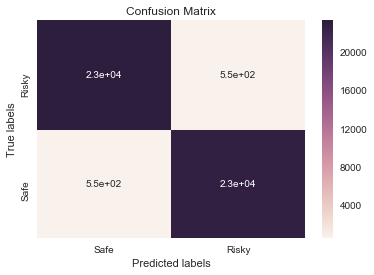

In [202]:
ax= plt.subplot()
sns.heatmap(mt, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Safe', 'Risky']); ax.yaxis.set_ticklabels(['Safe', 'Risky']);

In [203]:
# False Positive and False Negative rates
from sklearn.metrics import f1_score

FP = (mt[0][1] / float(sum(mt[0])))*100
FN = (mt[1][0] / float(sum(mt[1])))*100
F1 = f1_score(y, res, average='binary')
print("False positive rate : %f %%" % FP)
print('False negative rate : %f %%' % FN)
print("F1 Score is: ", F1)

False positive rate : 2.295811 %
False negative rate : 2.332921 %
F1 Score is:  0.9766707894400136


In [204]:
## AUC
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, res, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("The model AUC is: ", auc)

The model AUC is:  0.9768563382270999


In [190]:
import sys
!{sys.executable} -m pip install prettytable
import prettytable

In [205]:
## Model Summary

import prettytable
x = prettytable.PrettyTable(["Random Forest", "n_estimators = 150"])
x.add_row(["10-fold CV Accuracy", str(round(cv_results['test_score'].mean()*100,3))+"%"])
x.add_row(["False Positive", str(round(FP,3))+"%"]) 
x.add_row(["False Negative", str(round(FN,3))+"%"]) 
x.add_row(["F1 Score", round(F1,3)])  
x.add_row(["AUC", round(auc,3)])
print(x)

+---------------------+--------------------+
|    Random Forest    | n_estimators = 150 |
+---------------------+--------------------+
| 10-fold CV Accuracy |      92.795%       |
|    False Positive   |       2.296%       |
|    False Negative   |       2.333%       |
|       F1 Score      |       0.977        |
|         AUC         |       0.977        |
+---------------------+--------------------+


Feature ranking:
1. feature no of subdir (0.202283)
2. feature create_age(months) (0.164614)
3. feature len of url (0.158797)
4. feature file extension (0.136176)
5. feature len of domain (0.105130)
6. feature no of subdomain (0.057108)
7. feature expiry_age(months) (0.048354)
8. feature update_age(days) (0.040318)
9. feature risk indicator (0.033404)
10. feature no of queries (0.022276)
11. feature country (0.020440)
12. feature no of hyphen (0.006946)
13. feature contains IP (0.003041)
14. feature presence of Suspicious_TLD (0.000415)
15. feature no of dots (0.000350)
16. feature no of double slash (0.000344)
17. feature no of at (0.000005)


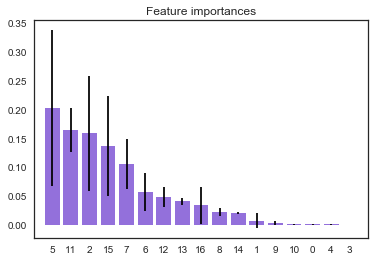

In [206]:
forest = clf
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, list(URLdata.drop(['url','label'],axis=1))[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="mediumpurple", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [208]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8, color="mediumpurple")
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color="mediumpurple", label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(y_test, y_pred_class))
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

In [209]:
for i in clf.predict([[  1       ,   1        ,   3.8286414 ,   3      ,
          0        ,   2        ,   0        ,  20        ,
          0        ,   0       ,   0        ,  95        ,
          1        ,   2        ,  98        , 184        ,
          1        ],
       [  0.        ,   0.        ,   5.09986643,   0.        ,
          0.        ,   6.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -1.        ,
         -1.        ,  -1.        ,  89.        , 262.        ,
          1.        ]]):
    print(i)
clf.predict_proba([[  1       ,   1        ,   3.8286414 ,   3      ,
          0        ,   2        ,   0        ,  20        ,
          0        ,   0       ,   0        ,  95        ,
          1        ,   2        ,  98        , 184        ,
          1        ],
       [  0.        ,   0.        ,   5.09986643,   0.        ,
          0.        ,   6.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -1.        ,
         -1.        ,  -1.        ,  89.        , 262.        ,
          1.        ]])

1
0


array([[0.04666667, 0.95333333],
       [0.66      , 0.34      ]])

Accuracy: 0.9768578258202356
Null accuracy:
 0    23826
1    23447
dtype: int64
Percentage of ones: 0.49599136928056187
Percentage of zeros: 0.5040086307194381
True: [1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0]
Pred: 0     1
1     0
2     0
3     1
4     1
5     0
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    0
21    1
22    1
23    1
24    0
dtype: int64


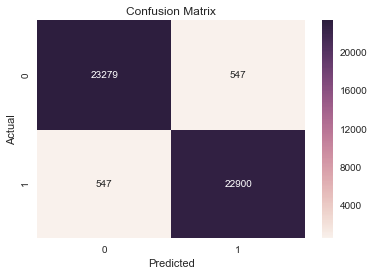

Classification Accuracy: 0.9768578258202356
Classification Error: 0.023142174179764385
False Positive Rate: 0.022958112985813815
Precision: 0.9766707894400136
AUC Score: 0.9768563382270999
Cross-validated AUC: 0.9774305207188428
First 10 predicted responses:
 [1 0 0 1 1 0 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.         1.        ]
 [0.5        0.5       ]
 [0.95875    0.04125   ]
 [0.06       0.94      ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.06666667 0.93333333]
 [0.02       0.98      ]
 [0.01333333 0.98666667]]
First 10 predicted probabilities:
 [1.         0.5        0.04125    0.94       1.         0.
 0.         0.93333333 0.98       0.98666667]


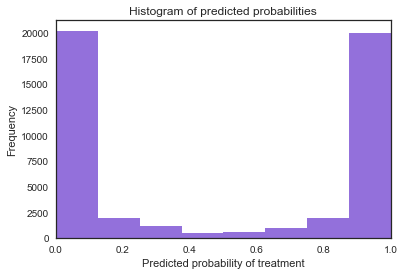

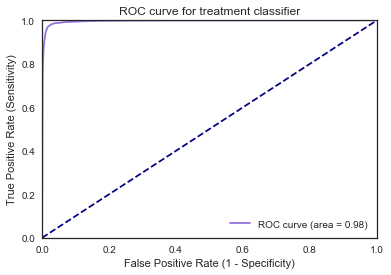

In [210]:
y = pd.Series(y)
res = pd.Series(res)
evalClassModel(clf, y, res, plot=True)